<h2>분석의 목적</h2>

주어진 데이터는 은행에서 시행하는 텔레마케팅을 통해 장기예금상품을 상품가입을 했는 지에 대한 데이터이다.<br>
보다 효율적인 마케팅을 위해 고객에 대한 정보가 주어졌을 때, 해당 고객이 상품가입을 할 지에 대한 예측을 하는 모델을 만드는 것을 목표로 한다.

<h3>데이터 출처</h3>

활용한 데이터는 머신러닝 경진대회 플랫폼 캐글(Kaggle)에 게시된 'Success of Bank Telemarketing Data'의 데이터이다.<br>
해당 데이터는 2019년 12월 19일에 업로드가 되었으며, 1.65MB의 크기를 가진 csv파일이다.<br><br>
출처 - https://www.kaggle.com/raosuny/success-of-bank-telemarketing-data

<h2>탐색적 데이터분석(EDA)</h2>

<h3>모듈 및 데이터 로딩</h3>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('./Data/Alpha_bank.csv')

<h3>데이터 확인</h3>

In [3]:
data.shape

(30477, 8)

데이터는 8개의 특성으로 이루어져 있으며, 총 30477개의 데이터가 존재한다.

In [4]:
data.head(10)

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,housemaid,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin.,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin.,married,Professional_Education,no,no,no,no
5,24,technician,single,Professional_Education,no,yes,no,no
6,25,services,single,Secondary_Education,no,yes,no,no
7,25,services,single,Secondary_Education,no,yes,no,no
8,29,blue-collar,single,Secondary_Education,no,no,yes,no
9,57,housemaid,divorced,Primary_Education,no,yes,no,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30477 entries, 0 to 30476
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30477 non-null  int64 
 1   Job             30477 non-null  object
 2   Marital_Status  30477 non-null  object
 3   Education       30477 non-null  object
 4   Default_Credit  30477 non-null  object
 5   Housing_Loan    30477 non-null  object
 6   Personal_Loan   30477 non-null  object
 7   Subscribed      30477 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


8개의 특성 모두 결측값이 없으며 8개의 특성 중 정수형 변수가 1개, 문자열 변수가 7개로 이루어져 있다.<br>
그 중 'Default_Credit', 'Housing_Loan', 'Personal_Loan', 'Subscribed' 변수는 yes, no로 이루어진 이진 변수임을 확인할 수 있다.<br>
분석의 목적을 고려하면 실제 가입여부를 알려주는 'Subscribed'가 target이 될 것이라 판단했다.

<h3>데이터 설명</h3>

Age : 고객의 나이<br>
Job : 고객의 직업<br>
Marital_Status : 고객의 결혼여부<br>
Education : 고객의 교육수준<br>
Default_Credit : 신용파산 여부<br>
Housing_Loan : 주택구입 자금대출 여부<br>
Personal_Loan : 개인대출 여부<br>
Subscribed : 상품가입 여부

In [6]:
data.describe()

,Age
count,30477.000000
mean,39.028120
std,10.333885
min,17.000000
25%,31.000000
50%,37.000000
75%,45.000000
max,95.000000


In [7]:
data.median()

Age    37.0
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

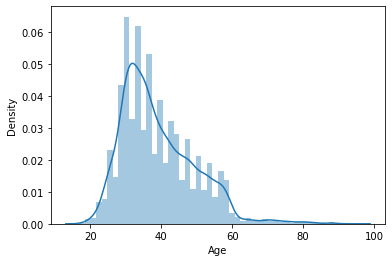

In [8]:
sns.distplot(data['Age'])

연속형 변수 'Age'의 분포는 Positive Skew 형태를 띄고 있으며, 평균 나이는 39세 중앙값은 37세로 확인된다.<br>
1분위수가 31세, 3분위수가 45세까지로 30대와 40대가 데이터에서 높은 비중을 차지하고 있음을 확인하였다.

<h3>이상치 인식과 처리</h3>

In [9]:
# IQR
des = data.describe()
IQR = des.loc['75%'] - des.loc['25%']
Min_out = des.loc['25%'] - 1.5*IQR
Max_out = des.loc['75%'] + 1.5*IQR
print("이상치: {}, {}".format(Min_out[0], Max_out[0]))

# ESD
Mean = des.loc['mean']
Stdev = des.loc['std']
Min_out = Mean - 3*Stdev
Max_out = Mean + 3*Stdev
print("이상치: {0:0.2f}, {1:0.2f}".format(Min_out[0], Max_out[0]))

이상치: 10.0, 66.0
이상치: 8.03, 70.03


이상치 인식방법 중 ESD와 IQR을 이용한 결과, 위와 같은 값이 나왔다.<br>
'Age'의 최소값이 17세이기 때문에 하위 이상치는 없으며, 최대값은 95세라 IQR과 ESD의 방법 모두 이상치로 인식된다.<br>
이상치는 분석의 경우에 따라 처리해줄 수도 있고 처리하지 않을 수도 있다.<br>
본 분석은 연령별 특성에 따라 상품가입 여부가 다르게 나타날 수 있다고 판단하였다.<br>
따라서 이상치를 제거하지 않고 모든 데이터를 분석에 사용하기로 결론지었다.

<AxesSubplot:xlabel='Job', ylabel='count'>

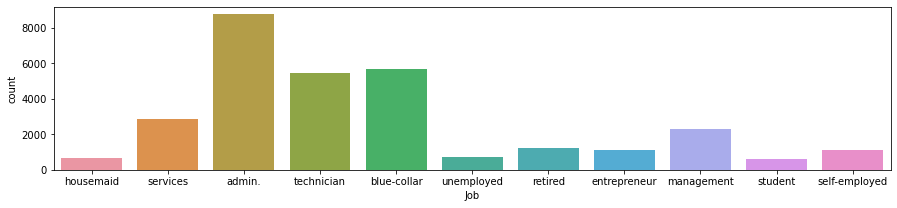

In [10]:
countplt, ax = plt.subplots(figsize = (15,3))
sns.countplot(data['Job'])

직업변수의 경우 총 11가지의 종류가 있으며, 관리자(admin) 직업이 가장 많은 것으로 확인되었다.<br>
비중이 높은 상위 3개의 직종('admin', 'technician', 'blue-collar')이 전체의 비중의 절반 이상을 차지하고 있다.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

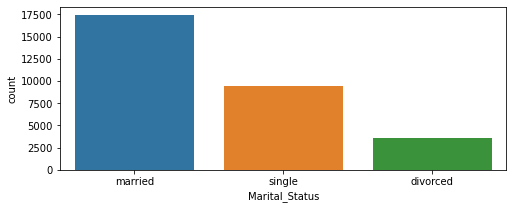

In [11]:
countplt, ax = plt.subplots(figsize = (8,3))
sns.countplot(data['Marital_Status'])

결혼여부변수는 기혼, 미혼, 이혼 총 3가지로 분류되었으며, 기혼의 비중이 가장 높은 것을 확인하였다.

<AxesSubplot:xlabel='Education', ylabel='count'>

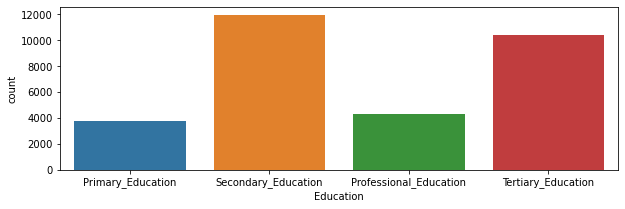

In [12]:
countplt, ax = plt.subplots(figsize = (10,3))
sns.countplot(data['Education'])

교육수준변수는 초등교육(primary), 중등교육(secondary), 대학교육(tertiary), 석박사교육(professional)로 나뉜다. <br>
중등교육과 대학교육의 비중이 높은 것을 확인하였다.

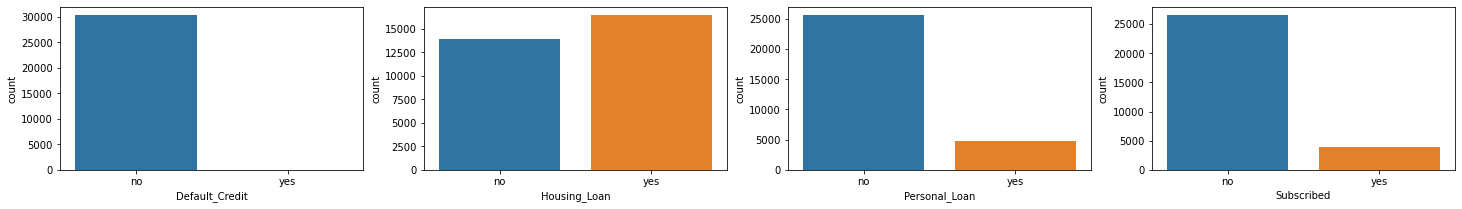

In [13]:
binary_col = ['Default_Credit', 'Housing_Loan', 'Personal_Loan', 'Subscribed']

f, ax = plt.subplots(ncols=4, figsize = (25, 3))
for num,col in enumerate(binary_col):
    sns.countplot(data[col], ax=ax[num])

예, 아니오로 나뉘는 이산변수들이다.<br>
신용파산 여부는 육안으로 보았을 때, 전부 no인 것으로 보인다. 이후 실제로 no만 있는지 확인해볼 예정이다.(만약 전부 no라면 변수의 의미가 없기때문에 제거해야할 것이다.)<br>
주택구입 자금대출은 고른 분포의 답변 형태를 보이고 있다.<br>
개인대출 여부와 상품가입 여부는 no의 빈도가 높은 불균형 형태를 이루고있다.<br>
특히 상품가입 여부의 경우는 분석의 target data로 사용될 예정이기 때문에, 자료의 불균형이 모델의 성능에 영향을 끼치지 않도록 샘플링 기법을 고려해야 한다.<br>
언더샘플링의 경우 소실되는 데이터가 너무 많고 오버샘플링은 과적합의 문제가 발생할 수 있기 때문에 과적합을 최소화 할 수 있는 SMOTE를 사용하기로 했다.<br>
평가 시에는 F-Score와 ROC커브를 성능의 척도로 사용하는 것이 좋아보인다.

In [14]:
data.groupby(data['Default_Credit']).count()

,Age,Job,Marital_Status,Education,Housing_Loan,Personal_Loan,Subscribed
Default_Credit,,,,,,,
no,30474,30474,30474,30474,30474,30474,30474
yes,3,3,3,3,3,3,3


yes가 3개가 있으므로 제거하지않기로 한다.

<h2>데이터 전처리</h2>

<h3>명목, 서열척도 변수 확인</h3>

In [15]:
str_cols = [col for col in data.columns if data[col].dtype in ['object']]
for col in str_cols:
    print('{}:'.format(col),data[col].nunique())

Job: 11
Marital_Status: 3
Education: 4
Default_Credit: 2
Housing_Loan: 2
Personal_Loan: 2
Subscribed: 2


30477개의 데이터의 종류가 최대 11개까지밖에 존재하지 않기 때문에, 전부 활용하기로 한다.

<h3>라벨 인코딩</h3>

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
def EncodingLabel(x):
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    return label

In [18]:
pre_data = data.copy()
pre_data[str_cols] = data[str_cols].apply(EncodingLabel)

라벨 인코딩을 활용하여 명목변수를 숫자형 카테고리 값으로 변환하였다.

In [19]:
pre_data.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,3,1,0,0,0,0,0
1,37,7,1,2,0,1,0,0
2,40,0,1,0,0,0,0,0
3,56,7,1,2,0,0,1,0
4,59,0,1,1,0,0,0,0


<h3>결측치 확인 및 처리</h3>

In [20]:
pre_data.isna().sum() / len(pre_data)

Age               0.0
Job               0.0
Marital_Status    0.0
Education         0.0
Default_Credit    0.0
Housing_Loan      0.0
Personal_Loan     0.0
Subscribed        0.0
dtype: float64

결측값이 존재하지 않음을 확인하였다.

<h3>데이터 불균형 처리</h3>

In [21]:
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler

In [22]:
sample = SMOTE()

In [23]:
X = pre_data[['Age','Job','Marital_Status', 'Education','Default_Credit', 'Housing_Loan', 'Personal_Loan']]
y = pre_data['Subscribed']

In [24]:
X_sm, y_sm = sample.fit_resample(X, y)

In [25]:
y.value_counts()

0    26621
1     3856
Name: Subscribed, dtype: int64

In [26]:
y_sm.value_counts()

0    26621
1    26621
Name: Subscribed, dtype: int64

<h3>Train, Test셋 나누기</h3>

학습을 시키기 위해 훈련셋과 테스트셋을 7:3비율로 나누어주었다.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 1000)

<h2>모델링</h2>

<h3>모델링 |  로지스틱 회귀</h3>

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Coefficient 확인
model.coef_

array([[ 0.01561313,  0.01001458,  0.16965292,  0.06277594, -0.0033193 ,
        -0.13264868, -0.83589859]])

<h3>예측 및 평가</h3>

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, confusion_matrix, roc_auc_score

In [34]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현률 : {2:.4f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.4f}'.format(f1))

In [35]:
pred = model.predict(X_test)

In [36]:
metrics(y_test, pred)

정확도 : 0.5384, 정밀도 : 0.5354, 재현률 : 0.6376
f1-score : 0.5820


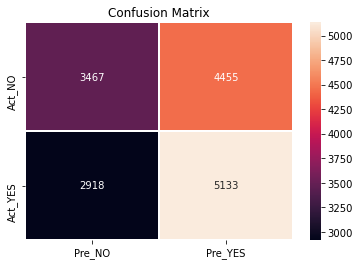

In [37]:
cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, linecolor = "white", linewidths = 0.5, xticklabels = ['Pre_NO', 'Pre_YES'], yticklabels = ['Act_NO', 'Act_YES'], fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

<function matplotlib.pyplot.show(close=None, block=None)>

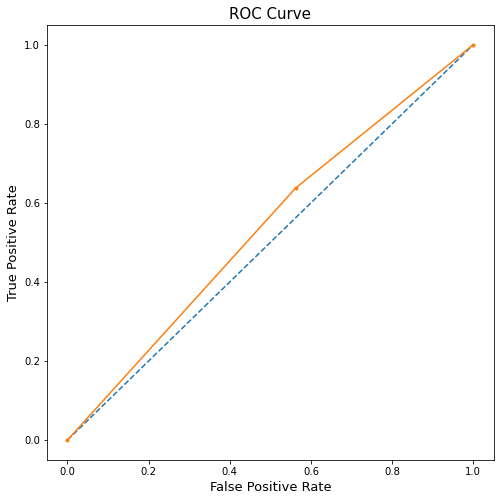

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve', fontsize=15)
plt.show

In [40]:
roc_auc_score(y_test, pred)

0.5376012805389123

<h3>모델링 | XG Boost</h3>

In [41]:
import xgboost as xgb

In [42]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

array 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환해주었다.

In [43]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

XG Boost의 하이퍼파라메터 설정 부분이다.<br>
최대 깊이는 3(통상적으로 3~10으로 설정), 학습률은 0.1로 설정했다.<br>
주어진 데이터가 이진분류(binary classification) 목적함수(objective)는 binary:logistic(이진 로지스틱)으로 설정하였다.<br>
손실함수로는 로그우도함수를 사용하였고 과적합을 회피하기 위해 조기종료를 설정하였다.<br>
총 400회의 iterate를 진행하였다.

In [44]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[19:27:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68820	eval-logloss:0.68832
[1]	train-logloss:0.68419	eval-logloss:0.68444
[2]	train-logloss:0.68077	eval-logloss:0.68115
[3]	train-logloss:0.67795	eval-logloss:0.67850
[4]	train-logloss:0.67551	eval-logloss:0.67616
[5]	train-logloss:0.67343	eval-logloss:0.67421
[6]	train-logloss:0.67170	eval-logloss:0.67255
[7]	train-logloss:0.66991	eval-logloss:0.67076
[8]	train-logloss:0.66832	eval-logloss:0.66934
[9]	train-logloss:0.66659	eval-logloss:0.66770
[10]	train-logloss:0.66509	eval-logloss:0.66631
[11]	train-logloss:0.66396	eval-loglos

In [45]:
pred_probs = xgb_model.predict(dtest)

In [46]:
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]

<h3>예측 및 평가</h3>

모델에서는 결과값이 확률로 주어지기 때문에, 예측확률이 0.5보다 크면 1, 그렇지 않으면 0으로 나누어 저장하였다.

In [47]:
metrics(y_test, preds)

정확도 : 0.6252, 정밀도 : 0.6336, 재현률 : 0.6081
f1-score : 0.6206


단일 로지스틱 모델로 예측했을 때 보다 향상된 것을 확인할 수 있다.

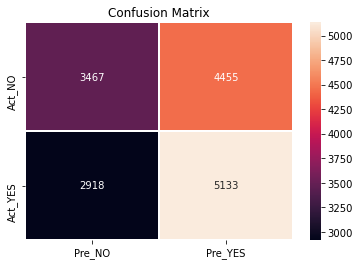

In [48]:
cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, linecolor = "white", linewidths = 0.5, xticklabels = ['Pre_NO', 'Pre_YES'], yticklabels = ['Act_NO', 'Act_YES'], fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

<function matplotlib.pyplot.show(close=None, block=None)>

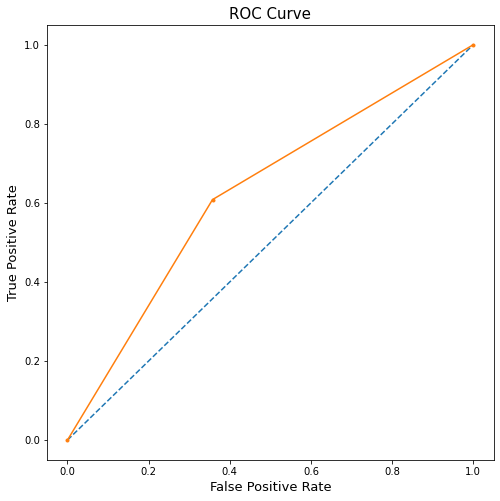

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve', fontsize=15)
plt.show

In [51]:
roc_auc_score(y_test, preds)

0.6253819808967768

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

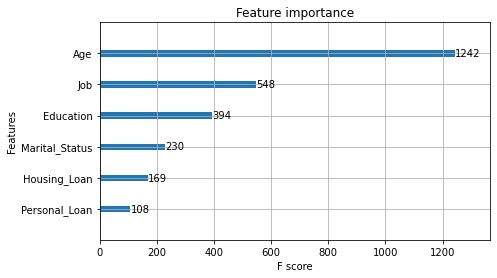

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(7, 4))
plot_importance(xgb_model, ax=ax)

F-score를 기반으로 특성중요도를 확인하였을 때, 나이가 가장 큰 영향을 끼치는 것을 확인할 수 있다.

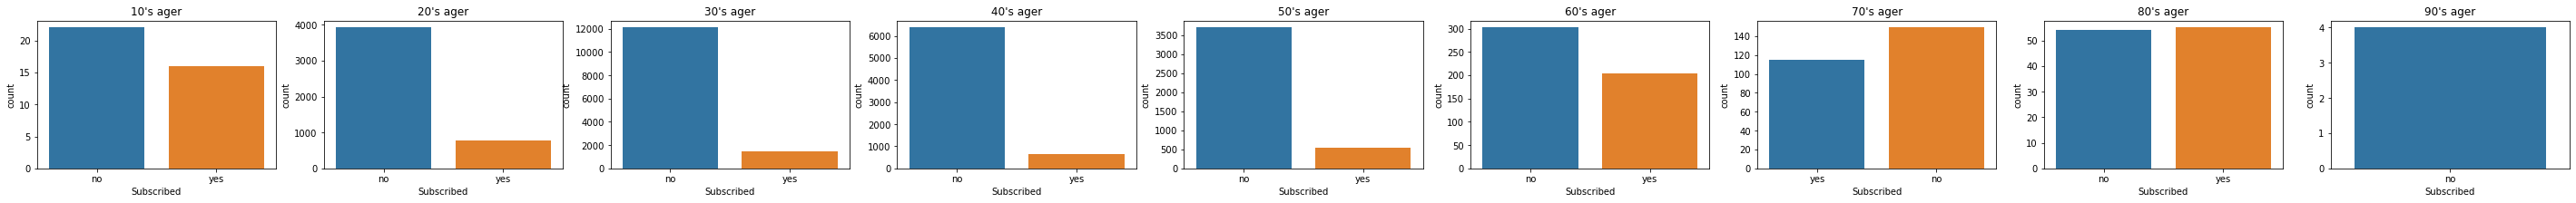

In [68]:
f, ax = plt.subplots(ncols=9, figsize = (50, 3))
for num, age in enumerate(range(10,100,10)):
    ager = data[(data['Age']>=age) & (data['Age']<age+10)]
    sns.countplot(ager['Subscribed'], ax=ax[num], x='who')
    ax[num].set_title("{}'s ager".format(age))

시각적으로 보았을 때, 10대와 60대 이상(90대 제외) 연령대에서 구독 비율이 높게 나왔다.<br>
하지만 각 연령별 집단의 수가 다르기 때문에, 연령별 구독한 사람의 수를 구해보았다.

In [77]:
for num, age in enumerate(range(10,100,10)):
    # 숫자형 카테고리로 전처리한 pre_data 사용
    ager = pre_data[(pre_data['Age']>=age) & (pre_data['Age']<age+10)]
    print("{}'s :".format(age), ager['Subscribed'].sum())

10's : 16
20's : 777
30's : 1493
40's : 656
50's : 541
60's : 203
70's : 115
80's : 55
90's : 0


구독한 사람의 수는 반대로 20대, 30대, 40대에서 높게 나타났다.<br>
해당 연령의 구독 비중은 낮더라도 집단의 수가 크기 때문에 전체 구독한 사람 중 해당 연령의 비중으로 보았을 때는 높게 나타나는 것이다.

In [86]:
# 각 연령별 구독 한 사람의 비중
for num, age in enumerate(range(10,100,10)):
    # 숫자형 카테고리로 전처리한 pre_data 사용
    ager = pre_data[(pre_data['Age']>=age) & (pre_data['Age']<age+10)]
    print("{}'s :{}".format(age, round(ager['Subscribed'].sum()/ager['Subscribed'].count(), 4)))

ratio
10's :0.4211
20's :0.1655
30's :0.1099
40's :0.0933
50's :0.1275
60's :0.402
70's :0.4356
80's :0.5046
90's :0.0


In [88]:
# 구독 한 사람 중 각 연령의 비중
for num, age in enumerate(range(10,100,10)):
    # 숫자형 카테고리로 전처리한 pre_data 사용
    ager = pre_data[(pre_data['Age']>=age) & (pre_data['Age']<age+10)]
    print("{}'s :{}".format(age, round(ager['Subscribed'].sum()/pre_data['Subscribed'].sum(), 4)))

10's :0.0041
20's :0.2015
30's :0.3872
40's :0.1701
50's :0.1403
60's :0.0526
70's :0.0298
80's :0.0143
90's :0.0
